# Final Project
---**An Image Classification Model to Facilitate the Diagnosis of Pneumonia**   

INFSCI 2440 SEC1010 ARTIFICIAL INTELLIGENCE  

Team member: 
- Jie Chen(jic115)
- Yi Yang(yiy101)
- John Song(chs342)


## Introduction  

As we all know, the COVID-19 pandemic has put tremendous pressure on our healthcare systems, with hospitals overwhelmed with patients and a shortage of healthcare personnel. In light of these challenges, we aim to address this issue by developing an image classification model that can assist in the diagnosis of pneumonia, an illness that requires accurate and timely diagnosis.  

## Data Resource  

[Chest X-Ray Images_Pneumonia](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/discussion)  


## Data Preprocessing

We use openCV libaray & numpy to convert image to a tensor with 3 channel.  We preprocessing this step in the local to save as pkl file.  

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

def resize_all(src, pkl_name, width, height):   
    data = dict()   
    data['label'] = []
    data['data'] =   []
     
    pkl_name = f"{pkl_name}_{height}x{width}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in ['NORMAL','PNEUMONIA']: # mac add one '.DS_Store' folder !!
           current_path = os.path.join(src, subdir)
           for file in os.listdir(current_path):
              im = cv.imread(os.path.join(current_path, file))
              im = cv.resize(im, (width, height)) 
              data['data'].append(im)
              if subdir == 'NORMAL':
                 data['label'].append(1)
              else :
                 data['label'].append(0)
              
           joblib.dump(data, pkl_name) # one folder at a time


data_path = 'test'
base_name = 'resized'
pkl_name = data_path + '_' + base_name
height = 66; width = 93

resize_all(src=data_path, pkl_name=pkl_name, height = height, width=width)


In [1]:
# mount data in drive to colab
from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


### read in data

In [8]:
import numpy as np
import os
import joblib
import matplotlib.pyplot as plt

In [4]:
# train data
path = '/content/drive/MyDrive/AI_project/'
pkl_name = path + 'train_resized' 
height = 66;width = 93
train = joblib.load(f'{pkl_name}_{height}x{width}px.pkl')
X_train = np.array(train['data'])
y_train = np.array(train['label'])

In [5]:
# validation data
path = '/content/drive/MyDrive/AI_project/'
pkl_name = path + 'val_resized' 
height = 66;width = 93
val = joblib.load(f'{pkl_name}_{height}x{width}px.pkl')
X_val = np.array(val['data']) 
y_val = np.array(val['label']) 

In [6]:
# test data
path = '/content/drive/MyDrive/AI_project/'
pkl_name = path + 'test_resized' 
height = 66;width = 93
test = joblib.load(f'{pkl_name}_{height}x{width}px.pkl')
X_test = np.array(test['data']) 
y_test = np.array(test['label']) 

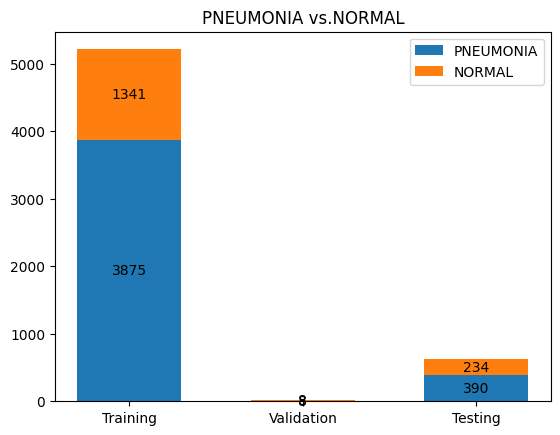

In [9]:
# visilization for training data, validation data, test data.
# 0 is PNEUMONIA   #1 is normal

# training data
t_pneumonia = [] 
t_normal = [] 

for i in range(len(X_train)):
  if(y_train[i]==0):
    t_pneumonia.append(X_train[i])
  else:
    t_normal.append(X_train[i])


# validation 

v_pneumonia = [] 
v_normal = [] 
for i in range(len(X_val)):
  if(y_val[i]==0):
    v_pneumonia.append(X_val[i])
  else:
    v_normal.append(X_val[i])

# test 
tt_pneumonia = [];
tt_normal = [];
for i in range(len(X_test)):
  if(y_test[i]==0):
    tt_pneumonia.append(X_test[i])
  else:
    tt_normal.append(X_test[i])


#### matplot 

species = ('Training', 'Validation', 'Testing')
label_counts = {
    'PNEUMONIA': np.array([len(t_pneumonia), len(v_pneumonia), len(tt_pneumonia)]),
    'NORMAL': np.array([len(t_normal), len(v_normal), len(tt_normal)]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for label, label_count in label_counts.items():
    p = ax.bar(species, label_count, width, label=label, bottom=bottom)
    bottom += label_count

    ax.bar_label(p, label_type='center')

ax.set_title('PNEUMONIA vs.NORMAL')
ax.legend()

plt.show()

In [10]:
# to make balanced dataset, we randomly delete 2534 PNEUMONIA from train dataset
np.random.seed(2023)
idx = np.random.choice(np.arange(3875),2534,replace = False)

X_train = np.delete(X_train,idx, axis = 0)
y_train = np.delete(y_train,idx, axis = 0)

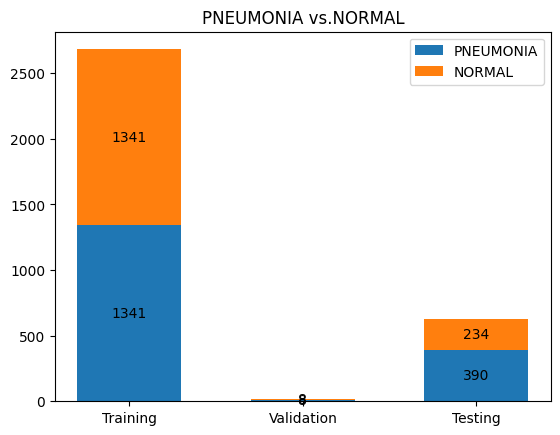

In [11]:
# visilization for training data, validation data, test data.
# 0 is PNEUMONIA   #1 is normal

# training data
t_pneumonia = [] 
t_normal = [] 

for i in range(len(X_train)):
  if(y_train[i]==0):
    t_pneumonia.append(X_train[i])
  else:
    t_normal.append(X_train[i])


# validation 

v_pneumonia = [] 
v_normal = [] 
for i in range(len(X_val)):
  if(y_val[i]==0):
    v_pneumonia.append(X_val[i])
  else:
    v_normal.append(X_val[i])

# test 
tt_pneumonia = [];
tt_normal = [];
for i in range(len(X_test)):
  if(y_test[i]==0):
    tt_pneumonia.append(X_test[i])
  else:
    tt_normal.append(X_test[i])


#### matplot 

species = ('Training', 'Validation', 'Testing')
label_counts = {
    'PNEUMONIA': np.array([len(t_pneumonia), len(v_pneumonia), len(tt_pneumonia)]),
    'NORMAL': np.array([len(t_normal), len(v_normal), len(tt_normal)]),
}
width = 0.6  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for label, label_count in label_counts.items():
    p = ax.bar(species, label_count, width, label=label, bottom=bottom)
    bottom += label_count

    ax.bar_label(p, label_type='center')

ax.set_title('PNEUMONIA vs.NORMAL')
ax.legend()

plt.show()

In [12]:
np.unique(y_train,return_counts= True)

(array([0, 1]), array([1341, 1341]))

## Build model with data augmentation:

In [13]:
# Data augmentation : refer to https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy/notebook
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 20,     # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,        # Randomly zoom image 
        width_shift_range=0.1,   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True)  # randomly flip images 

datagen.fit(X_train)

In [14]:
# specify model structure
from tensorflow import keras 
from tensorflow.keras import layers
  
inputs = keras.Input(shape=(66, 93,3))   
x = layers.Rescaling(1./255)(inputs) # normalize values to [0,1]
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding='same')(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding='same')(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding='same')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding='same')(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) # flatten internal representation to 1d vetor
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",  # loss function 
              optimizer="rmsprop",
              metrics=["accuracy"])

In [15]:
from keras.callbacks import ReduceLROnPlateau # adjust learn rate when metrics reach plateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2,
                                            verbose=1,factor=0.3, min_lr=0.000001)

In [16]:
# fit model 
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32) ,epochs = 12 , 
                    validation_data = datagen.flow(X_val, y_val) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/12
84/84 [==============================] - 57s 658ms/step - loss: 0.7324 - accuracy: 0.5455 - val_loss: 0.6814 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/12
84/84 [==============================] - 48s 567ms/step - loss: 0.5844 - accuracy: 0.7308 - val_loss: 0.7373 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/12
84/84 [==============================] - 48s 577ms/step - loss: 0.4707 - accuracy: 0.7938 - val_loss: 0.6512 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/12
84/84 [==============================] - 48s 567ms/step - loss: 0.3892 - accuracy: 0.8348 - val_loss: 0.6384 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/12
84/84 [==============================] - ETA: 0s - loss: 0.3595 - accuracy: 0.8490
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
84/84 [==============================] - 50s 602ms/step - loss: 0.3595 - accuracy: 0.8490 - val_loss: 0.5887 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 6/12
84/84 [==============================] - 48s 577ms

## Test & Save model

In [ ]:
# test model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")


# save
model.save("AI_finalProject_model.h5")

20/20 [==============================] - 2s 107ms/step - loss: 0.2735 - accuracy: 0.9071
Test accuracy: 0.907


### Model performace analysis:

#### 1. precision, racall ,f1 score etc

In [17]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5 , 0 ,1)

20/20 [==============================] - 3s 148ms/step


In [18]:
from sklearn import metrics
import pandas as pd
report = metrics.classification_report(y_test, y_pred, output_dict=True,
                                       target_names = ['Pneumonia','Normal'])
pd.DataFrame(report)

,Pneumonia,Normal,accuracy,macro avg,weighted avg
precision,0.922252,0.816733,0.879808,0.869493,0.882682
recall,0.882051,0.876068,0.879808,0.879060,0.879808
f1-score,0.901704,0.845361,0.879808,0.873532,0.880575
support,390.000000,234.000000,0.879808,624.000000,624.000000


#### 2.Confusion matrix

In [19]:
# confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
conmat = confusion_matrix(y_test,y_pred)

val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
df_cm.index = ['pneumonia','normal']
df_cm.columns = ['pneumonia','normal']

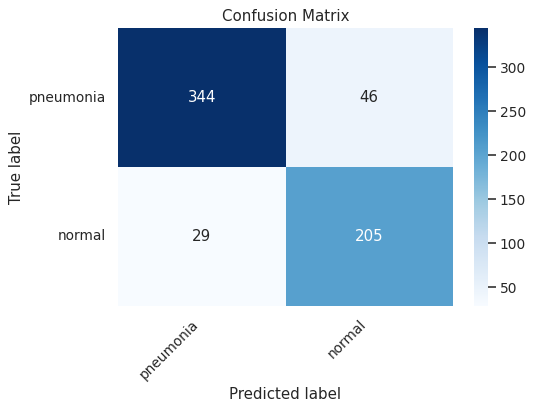

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(6, 4), dpi=90)
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues",fmt ='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

#### AUC


20/20 [==============================] - 2s 99ms/step


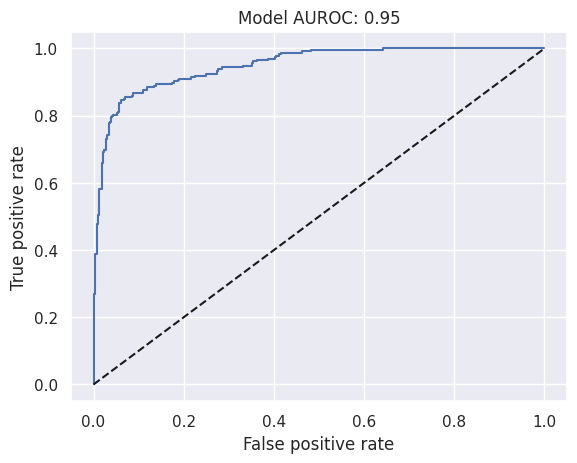

In [21]:
# AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.title(f'Model AUROC: {AUROC}');
plt.show()